# Global Temperature 
## Records by Major City (1849-2022)

This comprehensive dataset provides historical records of average temperatures by major city from 1849 to 2022. It's an invaluable resource for climate researchers, historians, and data scientists interested in analyzing long-term temperature trends and their impacts on different parts of the wod.l

*Acknowledgements
This dataset was compiled with data from multiple sources to provide a detailed view of global temperature changes over the past century and more*.d.

In [1]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from scipy import stats
from scipy.stats import gaussian_kde

import statsmodels.api as sm
import statsmodels.formula.api as smf
from statsmodels.compat import lzip

In [2]:
df = pd.read_csv('GlobalTemp.csv')

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239177 entries, 0 to 239176
Data columns (total 7 columns):
 #   Column                         Non-Null Count   Dtype  
---  ------                         --------------   -----  
 0   dt                             239177 non-null  object 
 1   AverageTemperature             228175 non-null  float64
 2   AverageTemperatureUncertainty  228175 non-null  float64
 3   City                           239177 non-null  object 
 4   Country                        239177 non-null  object 
 5   Latitude                       239177 non-null  object 
 6   Longitude                      239177 non-null  object 
dtypes: float64(2), object(5)
memory usage: 12.8+ MB


In [4]:
df.describe(include='all')

dt  AverageTemperature  AverageTemperatureUncertainty    City  \
count       239177       228175.000000                  228175.000000  239177   
unique        3239                 NaN                            NaN     100   
top     1983-12-01                 NaN                            NaN    Rome   
freq           100                 NaN                            NaN    3239   
mean           NaN           18.125969                       0.969343     NaN   
std            NaN           10.024800                       0.979644     NaN   
min            NaN          -26.772000                       0.040000     NaN   
25%            NaN           12.710000                       0.340000     NaN   
50%            NaN           20.428000                       0.592000     NaN   
75%            NaN           25.918000                       1.320000     NaN   
max            NaN           38.283000                      14.037000     NaN   

       Country Latitude Longitude  
count   239177   239177    239177  
unique      49       49        93  
top      India   31.35N    31.38E  
freq     36582    13875      6801  
mean       NaN      NaN       NaN  
std        NaN      NaN       NaN  
min        NaN      NaN       NaN  
25%        NaN      NaN       NaN  
50%        NaN      NaN       NaN  
75%        NaN      NaN       NaN  
max        NaN      NaN       NaN

In [5]:
df.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  City  \
239172  2013-05-01              18.979                          0.807  Xian   
239173  2013-06-01              23.522                          0.647  Xian   
239174  2013-07-01              25.251                          1.042  Xian   
239175  2013-08-01              24.528                          0.840  Xian   
239176  2013-09-01                 NaN                            NaN  Xian   

       Country Latitude Longitude  
239172   China   34.56N   108.97E  
239173   China   34.56N   108.97E  
239174   China   34.56N   108.97E  
239175   China   34.56N   108.97E  
239176   China   34.56N   108.97E

## Outliers Drop function

### Z-Score Method

In [6]:
def OutDropZ(df, col_choose, z_score_threshold):
    z_scores = np.abs(stats.zscore(df[col_choose]))
    outliers_mask = z_scores > z_score_threshold
    
    # Removing outliers using Z-Score method
    df_z = df[~outliers_mask]
    return df_z    

### IQR Method (Inter Quartile Range)

In [7]:
def OutDropQ(df, col_choose, iqr_threshold):
    Q1 = np.percentile(df[col_choose], 25, method='midpoint')
    Q3 = np.percentile(df[col_choose], 75, method='midpoint')
    IQR = Q3 - Q1
    
    # Define upper and lower bounds
    upper = Q3 + iqr_threshold * IQR
    lower = Q1 - iqr_threshold * IQR
    
    # Arrays to indicate outliers rows
    upper_array = np.where(df[col_choose] >= upper)[0]
    lower_array = np.where(df[col_choose] <= lower)[0]
    
    # Create a new DataFrame df_q without outliers
    df_q = df.drop(index=np.concatenate([upper_array, lower_array])).copy()
    return df_q

## World Distribution

In [8]:
avgT = 'AverageTemperature'
avgU = 'AverageTemperatureUncertainty'

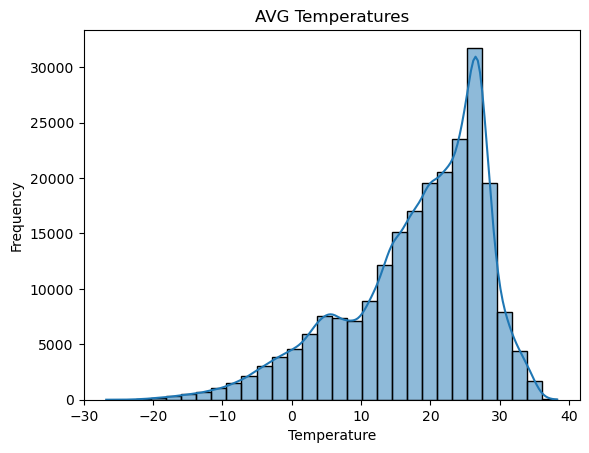

In [9]:
sns.histplot(df[avgT], bins=30, kde=True)
plt.title('AVG Temperatures')
plt.xlabel('Temperature')
plt.ylabel('Frequency')
plt.show()

# Global Temperature EDA
## Boxplot AVG Temperature

[Text(0.5, 1.0, 'AVG Temperature per Country'),
 Text(0, 0.5, ''),
 Text(0.5, 0, '')]

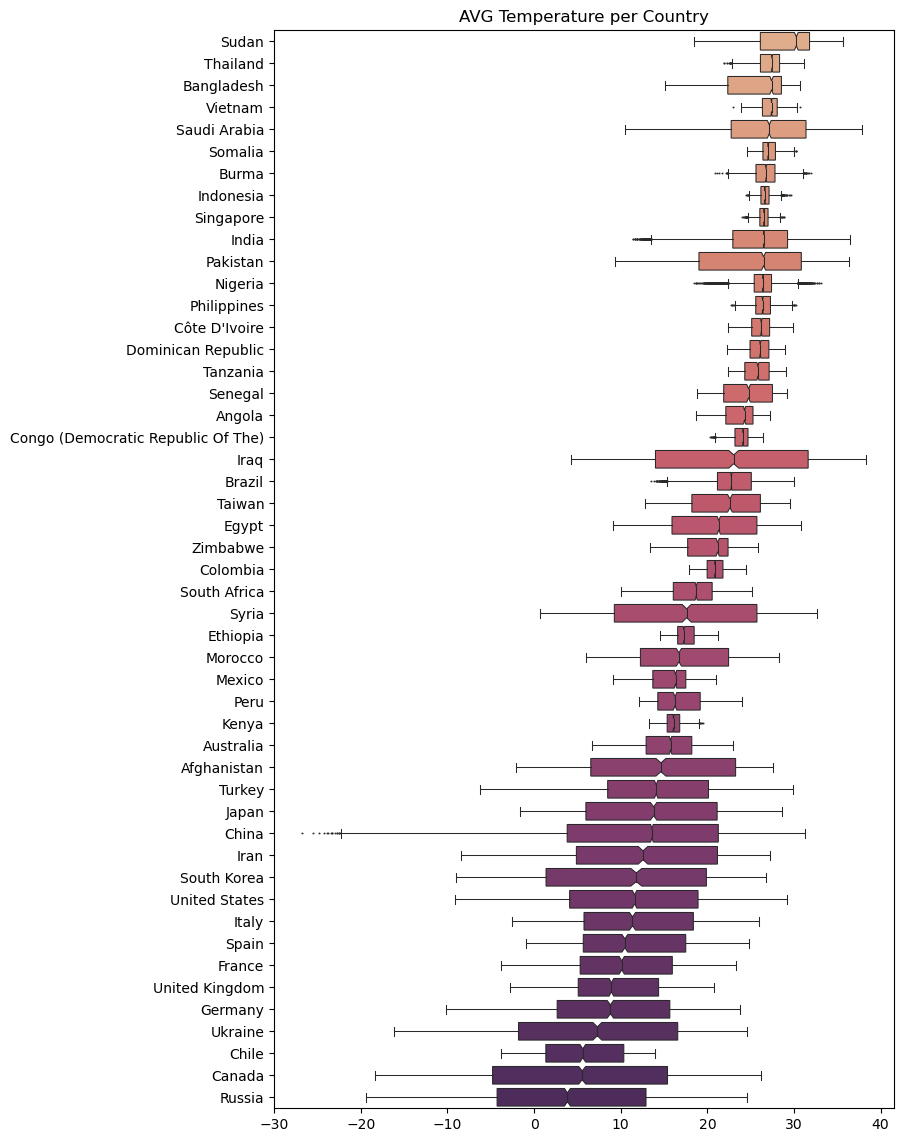

In [10]:
y_column = avgT
x_column = 'Country'
title = 'AVG Temperature per Country'

# Order boxplot values
group = df.groupby(x_column)[y_column].median()
order = group.sort_values(ascending=False).index

# Set figure
f, ax = plt.subplots(figsize=(8, 14))
sns.boxplot(data=df, x=y_column, y=x_column, width=.8, order=order, palette="flare", linewidth=.75, fliersize=.5, notch=True)
ax.set(title=title, ylabel='', xlabel='')

## Temp by year

In [11]:
# Convert 'dt' column to datetime type
df['dt'] = pd.to_datetime(df['dt'])

In [12]:
# Select the year and grouped mean
df['year'] = df['dt'].dt.year
df['Months'] = df['dt'].dt.month
avg_by_year = df.groupby('year')[avgT].mean()
avg_by_year.tail(10)

year
2004    19.672204
2005    19.607239
2006    19.793993
2007    19.854270
2008    19.608778
2009    19.833752
2010    19.911734
2011    19.549197
2012    19.668239
2013    20.263006
Name: AverageTemperature, dtype: float64

<Axes: xlabel='year', ylabel='AverageTemperature'>

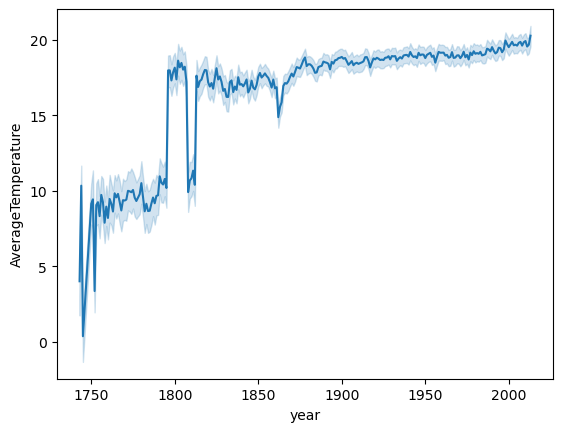

In [13]:
sns.lineplot(df, x="year", y=avgT,)

## Drastic increase after 1800

The drastic increase in the Earth's temperature since 1800 is primarily attributed to human activities that release large amounts of greenhouse gases into the atmosphere. These gases, such as carbon dioxide (CO2), methane (CH4), and nitrogen oxides (NOx), contribute to global warming by trapping heat in the atmosphere.

---

The main causes of the rise in concentrations of these greenhouse gases include:

Burning of Fossil Fuels: The Industrial Revolution from the 19th century onwards led to a significant increase in the burning of coal, oil, and natural gas for energy production, releasing substantial amounts of CO2 into the atmosphere.

Deforestation: Large-scale deforestation for agriculture and urban development reduces the number of trees that could absorb atmospheric CO2 during photosynthesis.

Industries and Processes: Industrial activities and processes such as cement production also release greenhouse gases.

Agriculture: Certain agricultural practices, such as rice cultivation and animal waste management, can lead to methane emissions.

---

These emissions have increased the concentration of greenhouse gases in the atmosphere, intensifying the greenhouse effect and causing global warming. The temperature rise has significant impacts on global climate, including extreme weather events, changes in precipitation patterns, and sea level rise. Understanding these phenomena is crucial for formulating policies and practices aimed at mitigating climate change and promoting environmental sustainability.

## Countries above 20° per year

In [14]:
# New degrees column
df['Above25Degrees'] = df['AverageTemperature'] >= 20

# Filtering countries with degrees above 20°
filtered_countries = df[df['Above25Degrees']]
countries20 = filtered_countries.groupby('year')['Country'].nunique().reset_index()
countries20.tail(10)

year  Country
254  2004       42
255  2005       43
256  2006       45
257  2007       41
258  2008       41
259  2009       43
260  2010       46
261  2011       44
262  2012       44
263  2013       44

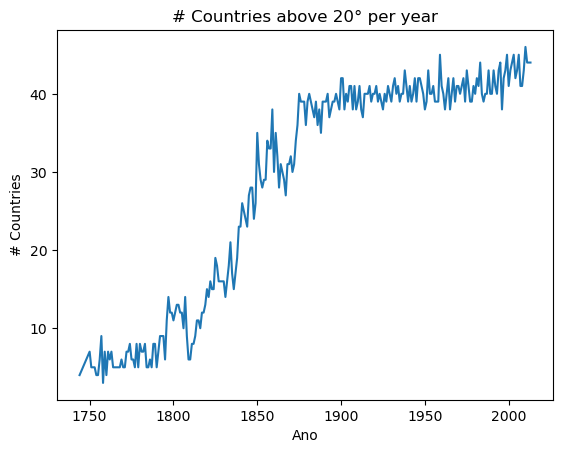

In [15]:
sns.lineplot(x='year', y='Country', data=countries20)
plt.title('# Countries above 20° per year')
plt.xlabel('Ano')
plt.ylabel('# Countries')
plt.show()

# Countries EDA

In [16]:
pd.options.mode.copy_on_write = True
inter_cols = [avgT, avgU]

## USA

In [17]:
eua = 'United States'
us_data = df[(df['Country'] == eua)]

In [18]:
us_data.isna().sum()

dt                                 0
AverageTemperature               218
AverageTemperatureUncertainty    218
City                               0
Country                            0
Latitude                           0
Longitude                          0
year                               0
Months                             0
Above25Degrees                     0
dtype: int64

### Linear Interpolation

In [19]:
us_data[inter_cols] = us_data[inter_cols].interpolate(method='linear')
us_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
year                             0
Months                           0
Above25Degrees                   0
dtype: int64

In [20]:
us_data.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
173003 2013-05-01              15.544                          0.281   
173004 2013-06-01              20.892                          0.273   
173005 2013-07-01              24.722                          0.279   
173006 2013-08-01              21.001                          0.323   
173007 2013-09-01              17.408                          1.048   

            City        Country Latitude Longitude  year  Months  \
173003  New York  United States   40.99N    74.56W  2013       5   
173004  New York  United States   40.99N    74.56W  2013       6   
173005  New York  United States   40.99N    74.56W  2013       7   
173006  New York  United States   40.99N    74.56W  2013       8   
173007  New York  United States   40.99N    74.56W  2013       9   

        Above25Degrees  
173003           False  
173004            True  
173005            True  
173006            True  
173007           False

### Outlier removal

In [21]:
z_score_threshold = 2
iqr_threshold = 1.5

In [22]:
us_dataZ = OutDropZ(us_data, avgT, z_score_threshold)
us_dataQ = OutDropQ(us_data, avgT, iqr_threshold)

In [23]:
us_data.shape

(8455, 10)

In [24]:
us_dataZ.shape

(8385, 10)

In [25]:
us_dataQ.shape

(8455, 10)

### AVG temperature (z-score)

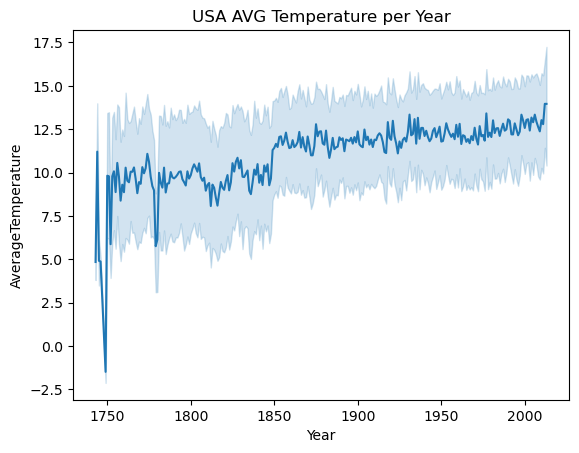

In [26]:
sns.lineplot(x='year', y=avgT, data=us_dataZ)
plt.title('USA AVG Temperature per Year')
plt.xlabel('Year')
plt.show()

### Cities Overview

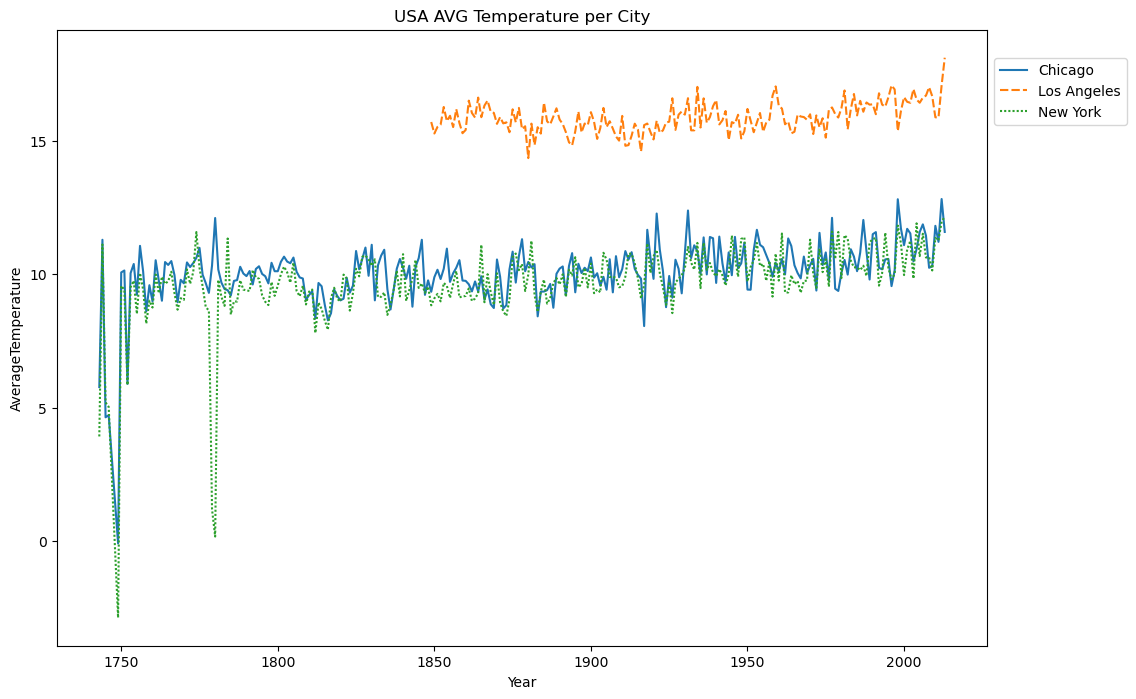

In [27]:
plt.subplots(figsize=(12, 8))
sns.lineplot(x='year', y=avgT, data=us_dataZ, style="City", hue="City", err_style="band", errorbar=None)
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('USA AVG Temperature per City')
plt.xlabel('Year')
plt.show()

## Brazil

In [28]:
br_data = df[(df['Country'] == 'Brazil')]
br_data.isna().sum()

dt                                 0
AverageTemperature               791
AverageTemperatureUncertainty    791
City                               0
Country                            0
Latitude                           0
Longitude                          0
year                               0
Months                             0
Above25Degrees                     0
dtype: int64

### Linear Interpolation

In [29]:
br_data[inter_cols] = br_data[inter_cols].interpolate(method='linear')
br_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
year                             0
Months                           0
Above25Degrees                   0
dtype: int64

In [30]:
br_data.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  \
198856 2013-05-01              25.757                          0.548   
198857 2013-06-01              25.007                          0.936   
198858 2013-07-01              24.419                          0.555   
198859 2013-08-01              23.928                          0.805   
198860 2013-09-01              23.928                          0.805   

            City Country Latitude Longitude  year  Months  Above25Degrees  
198856  Salvador  Brazil   13.66S    38.81W  2013       5            True  
198857  Salvador  Brazil   13.66S    38.81W  2013       6            True  
198858  Salvador  Brazil   13.66S    38.81W  2013       7            True  
198859  Salvador  Brazil   13.66S    38.81W  2013       8            True  
198860  Salvador  Brazil   13.66S    38.81W  2013       9           False

### Outlier removal

In [31]:
br_dataZ = OutDropZ(br_data, avgT, z_score_threshold)

In [32]:
br_data.shape

(12930, 10)

In [33]:
br_dataZ.shape

(12380, 10)

### AVG temperature (z-score)

In [34]:
br_cities = br_data['City'].unique()
br_cities

array(['Belo Horizonte', 'Brasília', 'Fortaleza', 'Rio De Janeiro',
       'São Paulo', 'Salvador'], dtype=object)

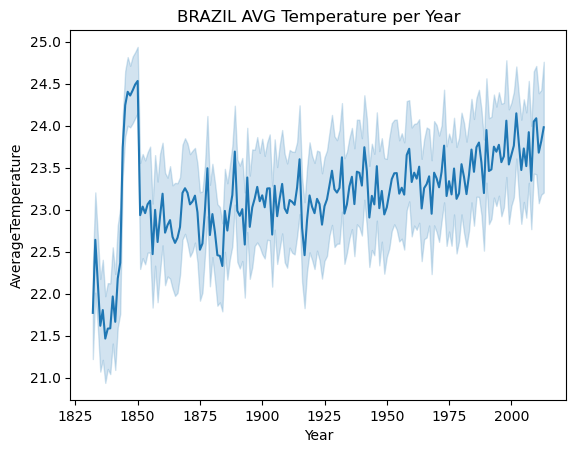

In [35]:
sns.lineplot(x='year', y=avgT, data=br_dataZ)
plt.title('BRAZIL AVG Temperature per Year')
plt.xlabel('Year')
plt.show()

### Cities Overview

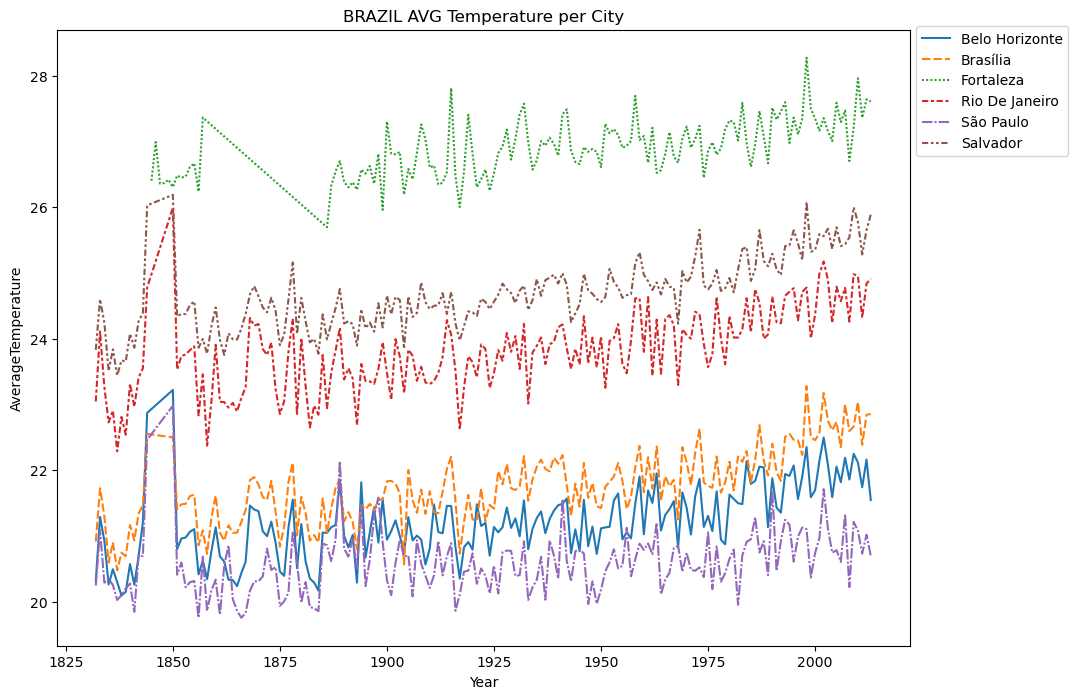

In [36]:
plt.subplots(figsize=(11, 8))
sns.lineplot(x='year', y=avgT, data=br_dataZ, style="City", hue="City", err_style="band", errorbar=None)
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('BRAZIL AVG Temperature per City')
plt.xlabel('Year')
plt.show()

### Hypothesis


While it's challenging to pinpoint specific historical events that might have directly caused changes in average temperatures in Brazil during the 1840s, there are some natural phenomena that could have influenced climate during that period. Keep in mind that detailed and reliable climate records from that time are limited, so the following suggestions are based on broader historical and climatological knowledge:

Volcanic Activity: Major volcanic eruptions can inject large amounts of ash and particles into the atmosphere, which can lead to short-term cooling by blocking sunlight. If there were significant volcanic eruptions globally around the 1840s, it could have affected temperatures.

Solar Variability: Changes in solar radiation, including fluctuations in the sun's activity, can influence Earth's climate. While solar cycles are relatively long-term, variations in solar output may contribute to climate variability over time.

Natural Climate Variability: Natural climate phenomena such as El Niño and La Niña events can influence weather patterns globally. These events occur in the Pacific Ocean and can lead to changes in atmospheric circulation, affecting temperature and precipitation patterns.

Land Use Changes: Human activities, such as deforestation or large-scale agricultural practices, can influence local climate conditions. Changes in land use during the 19th century may have had some impact on regional temperatures.

## China

In [37]:
ch_data = df[(df['Country'] == 'China')]
ch_data.isna().sum()

dt                                 0
AverageTemperature               492
AverageTemperatureUncertainty    492
City                               0
Country                            0
Latitude                           0
Longitude                          0
year                               0
Months                             0
Above25Degrees                     0
dtype: int64

### Linear Interpolation

In [38]:
ch_data[inter_cols] = ch_data[inter_cols].interpolate(method='linear')
ch_data.isna().sum()

dt                               0
AverageTemperature               0
AverageTemperatureUncertainty    0
City                             0
Country                          0
Latitude                         0
Longitude                        0
year                             0
Months                           0
Above25Degrees                   0
dtype: int64

In [39]:
ch_data.tail()

dt  AverageTemperature  AverageTemperatureUncertainty  City  \
239172 2013-05-01              18.979                          0.807  Xian   
239173 2013-06-01              23.522                          0.647  Xian   
239174 2013-07-01              25.251                          1.042  Xian   
239175 2013-08-01              24.528                          0.840  Xian   
239176 2013-09-01              24.528                          0.840  Xian   

       Country Latitude Longitude  year  Months  Above25Degrees  
239172   China   34.56N   108.97E  2013       5           False  
239173   China   34.56N   108.97E  2013       6            True  
239174   China   34.56N   108.97E  2013       7            True  
239175   China   34.56N   108.97E  2013       8            True  
239176   China   34.56N   108.97E  2013       9           False

### Outlier removal

In [40]:
ch_dataZ = OutDropZ(ch_data, avgT, z_score_threshold)

In [41]:
ch_data.shape

(35444, 10)

In [42]:
ch_dataZ.shape

(34173, 10)

In [43]:
ch_cities = ch_data['City'].unique()
ch_cities

array(['Changchun', 'Chengdu', 'Chongqing', 'Dalian', 'Guangzhou',
       'Harbin', 'Jinan', 'Nanjing', 'Peking', 'Shanghai', 'Shenyang',
       'Taiyuan', 'Tangshan', 'Tianjin', 'Wuhan', 'Xian'], dtype=object)

### AVG Temperature (z-score)

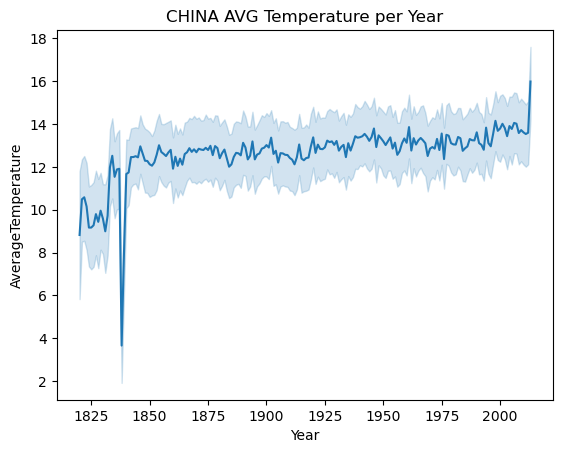

In [44]:
sns.lineplot(x='year', y=avgT, data=ch_dataZ)
plt.title('CHINA AVG Temperature per Year')
plt.xlabel('Year')
plt.show()

### City Overview

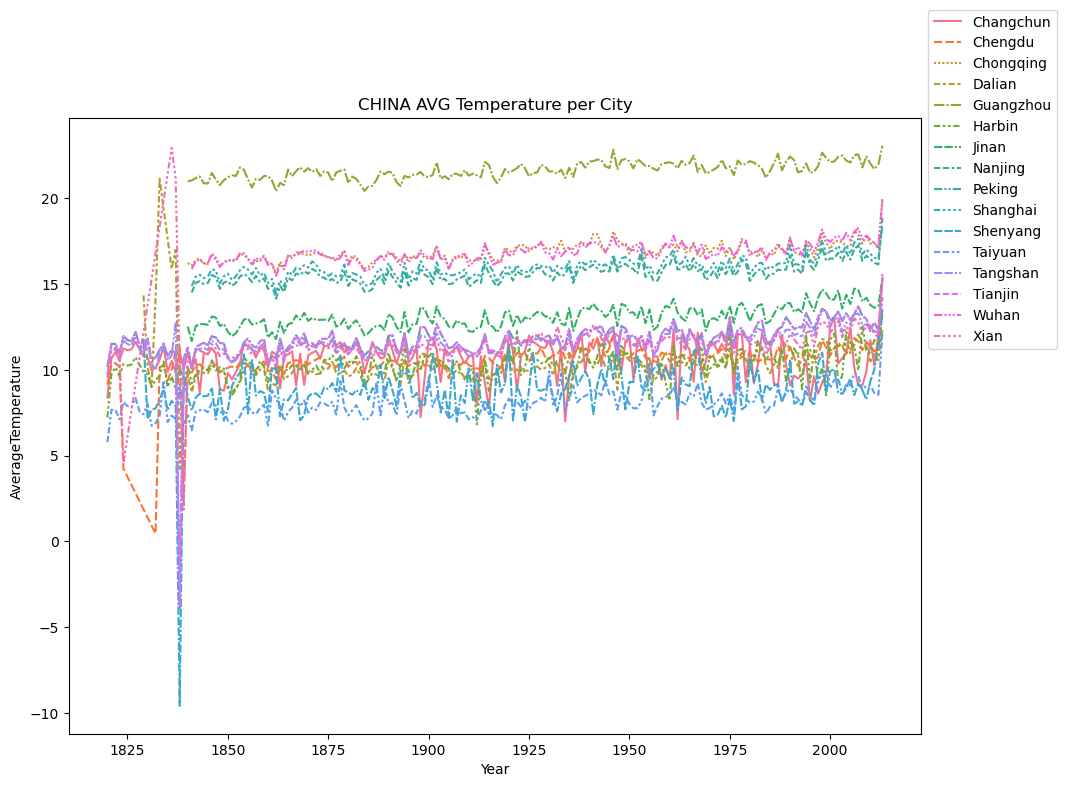

In [45]:
plt.subplots(figsize=(11, 8))
sns.lineplot(x='year', y=avgT, data=ch_dataZ, style="City", hue="City", err_style="band", errorbar=None)
plt.legend(loc='center left', bbox_to_anchor=(1,0.9))
plt.title('CHINA AVG Temperature per City')
plt.xlabel('Year')
plt.show()

# Countries loops

In [46]:
countries = df['Country'].unique()
countries

array(["Côte D'Ivoire", 'Ethiopia', 'India', 'Syria', 'Egypt', 'Turkey',
       'Iraq', 'Thailand', 'Brazil', 'Germany', 'Colombia',
       'South Africa', 'Morocco', 'China', 'United States', 'Senegal',
       'Tanzania', 'Bangladesh', 'Pakistan', 'Zimbabwe', 'Vietnam',
       'Nigeria', 'Indonesia', 'Saudi Arabia', 'Afghanistan', 'Ukraine',
       'Congo (Democratic Republic Of The)', 'Peru', 'United Kingdom',
       'Angola', 'Spain', 'Philippines', 'Iran', 'Australia', 'Mexico',
       'Somalia', 'Canada', 'Russia', 'Japan', 'Kenya', 'France', 'Burma',
       'Italy', 'Chile', 'Dominican Republic', 'South Korea', 'Singapore',
       'Taiwan', 'Sudan'], dtype=object)

## Histograms (Alphabetical)

In [47]:
country_list = sorted(countries)

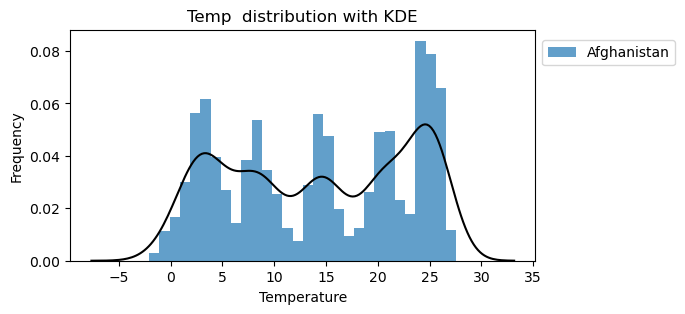

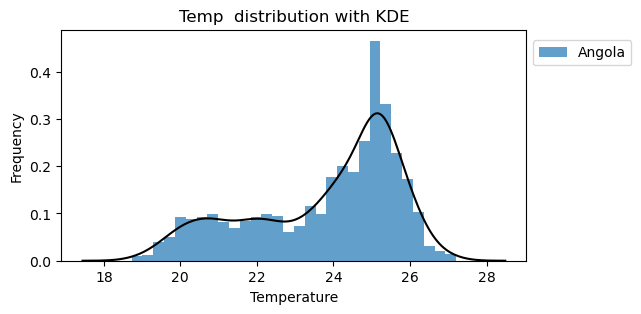

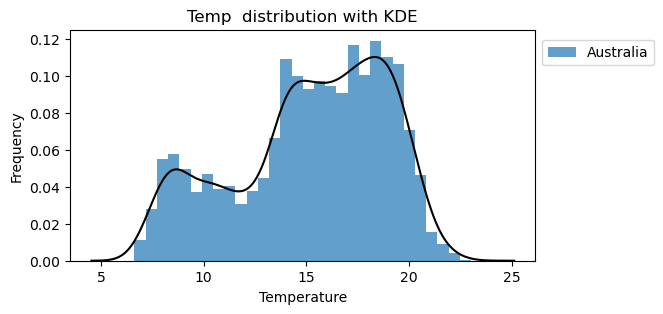

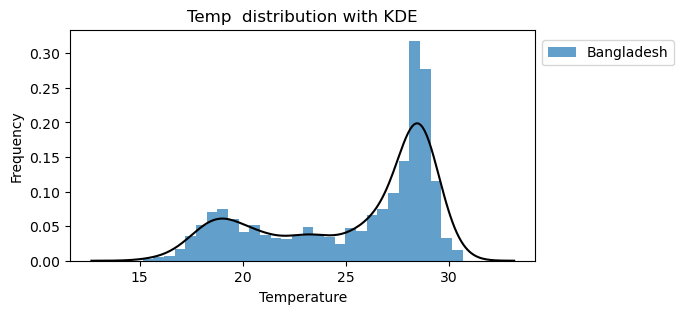

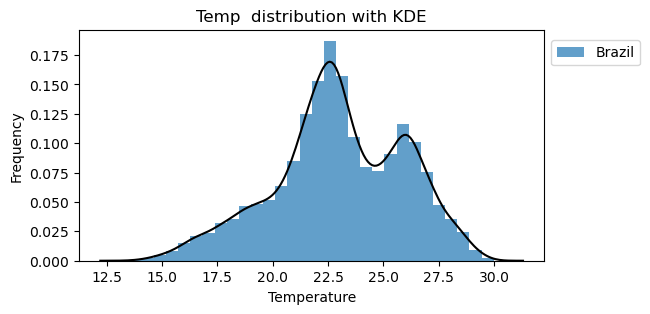

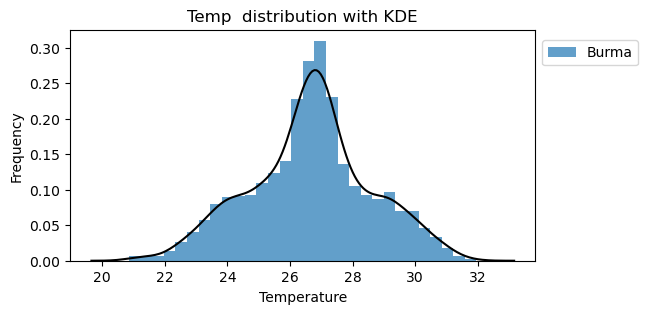

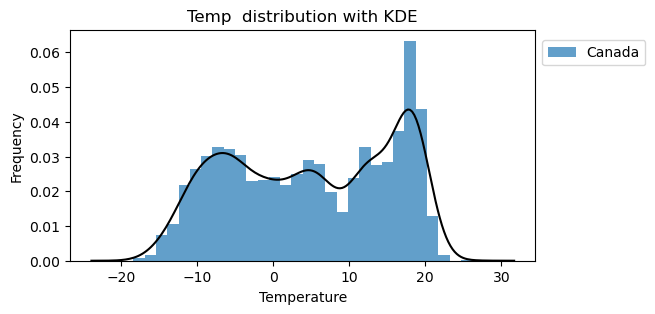

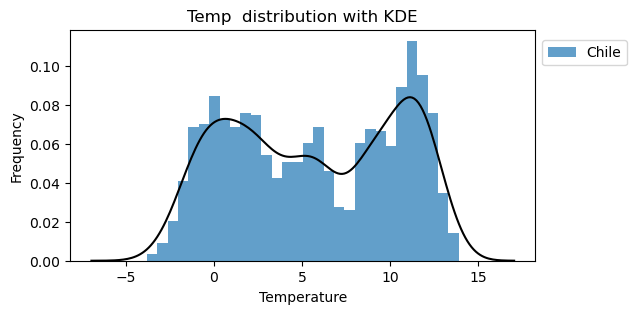

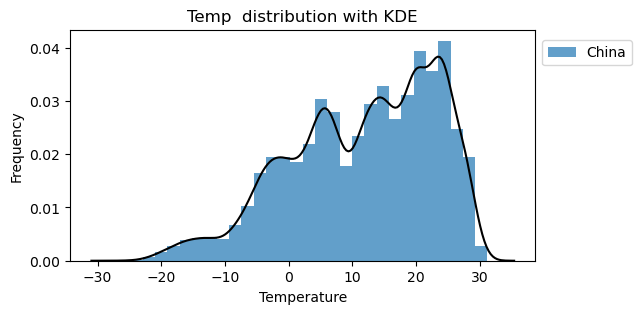

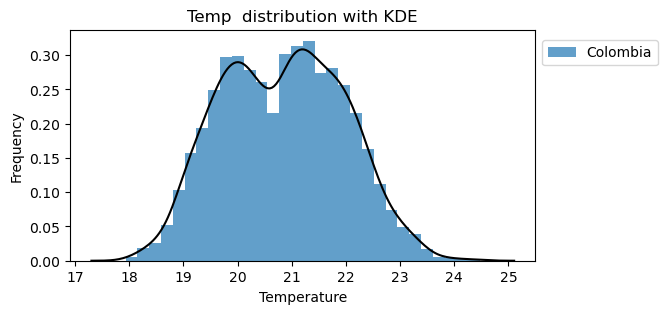

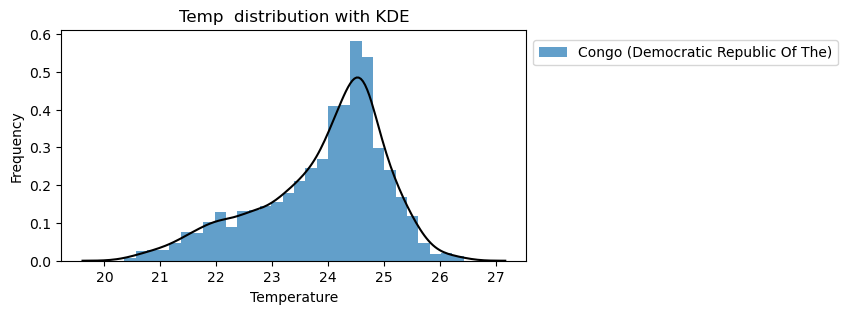

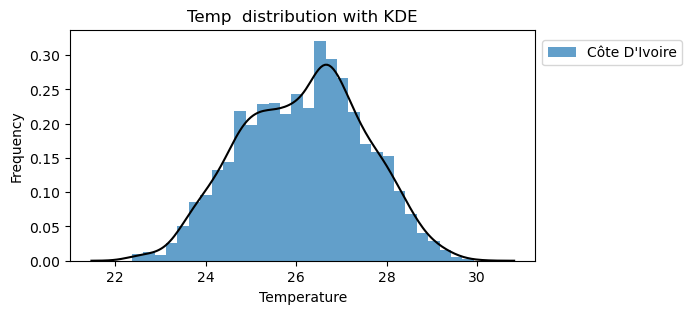

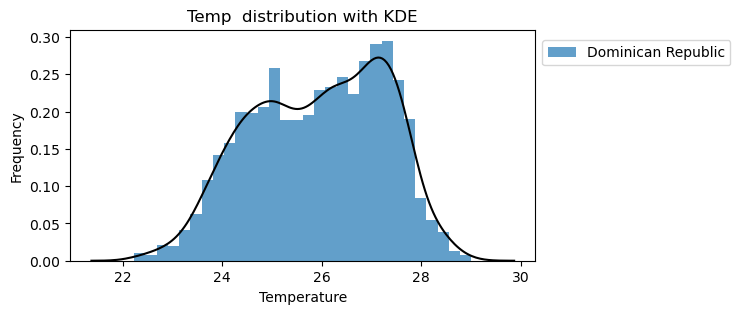

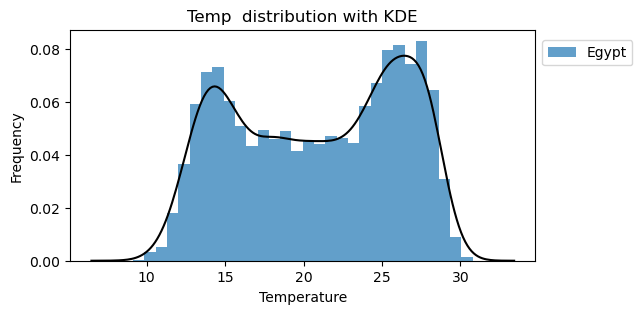

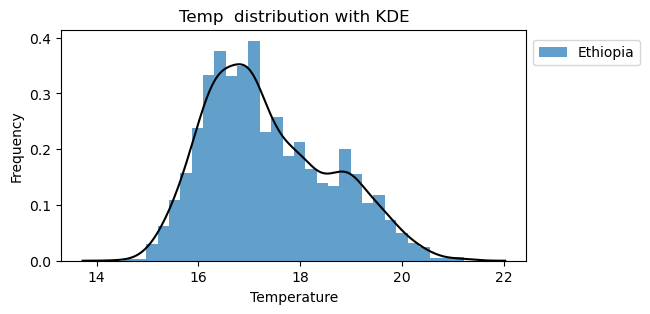

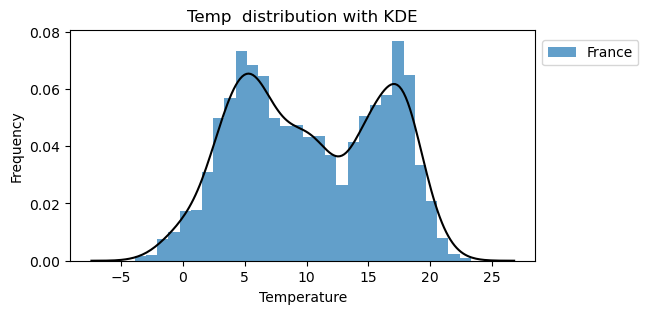

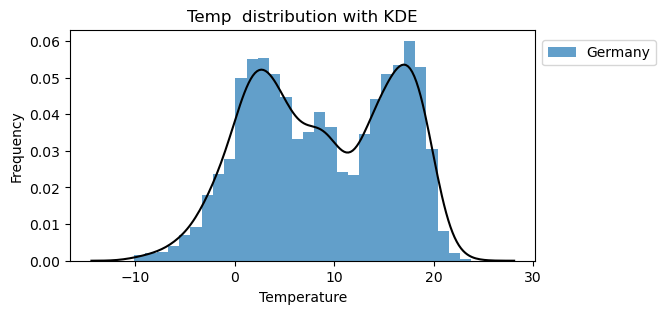

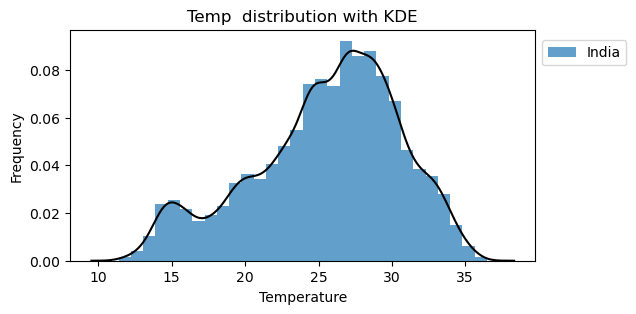

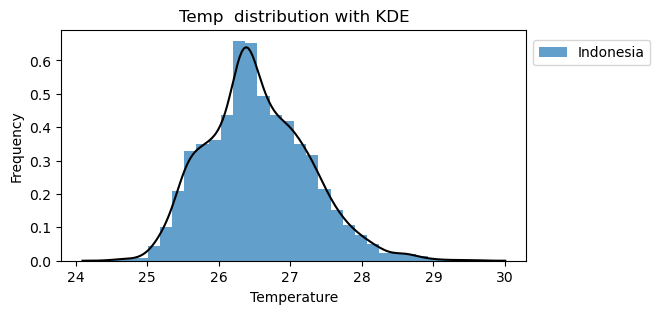

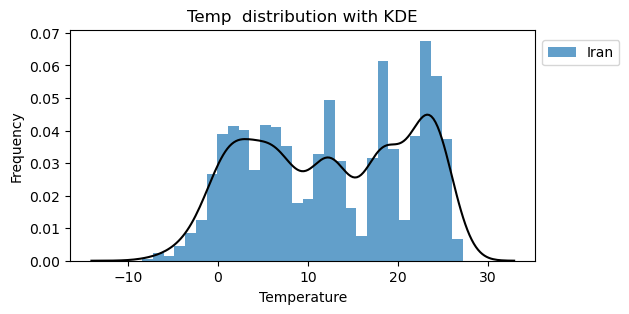

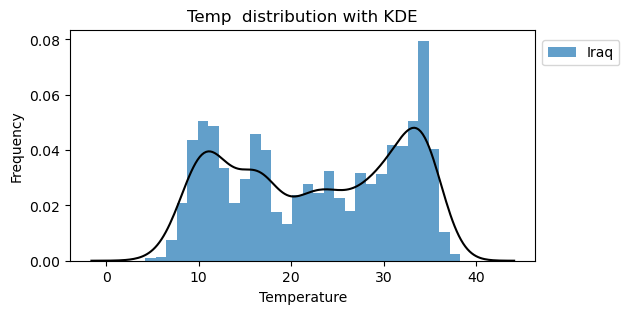

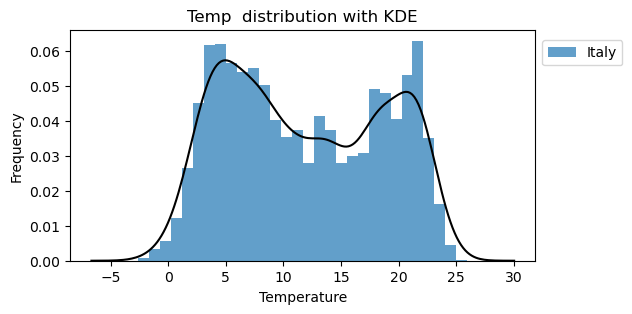

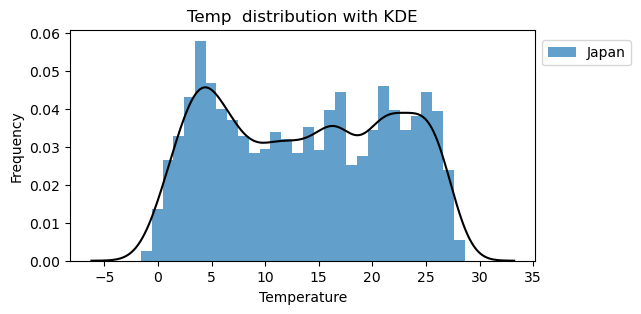

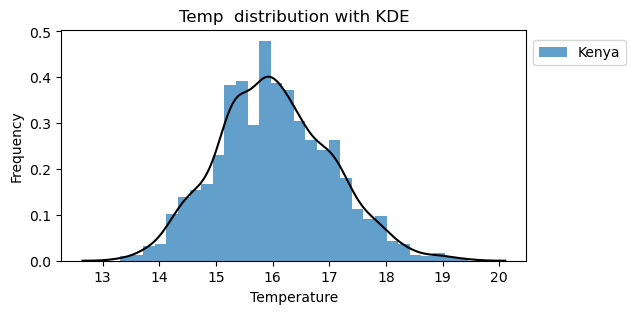

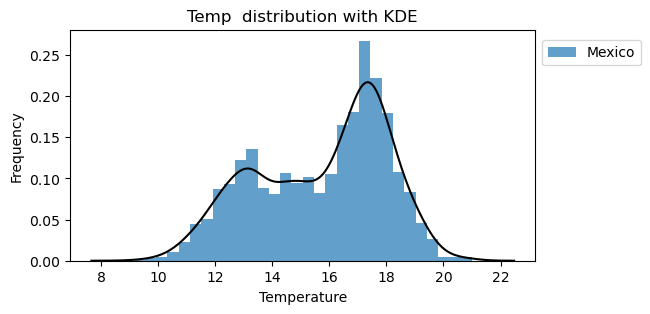

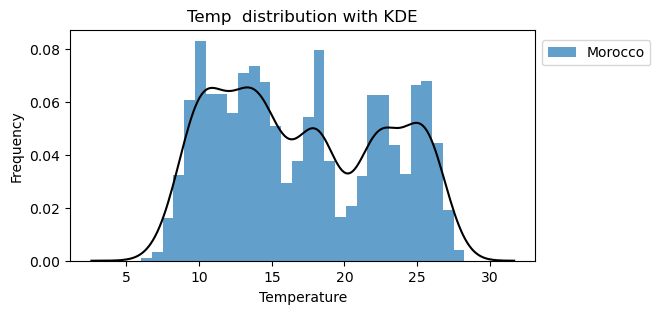

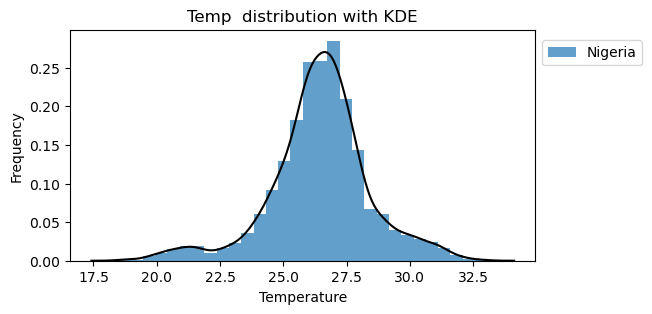

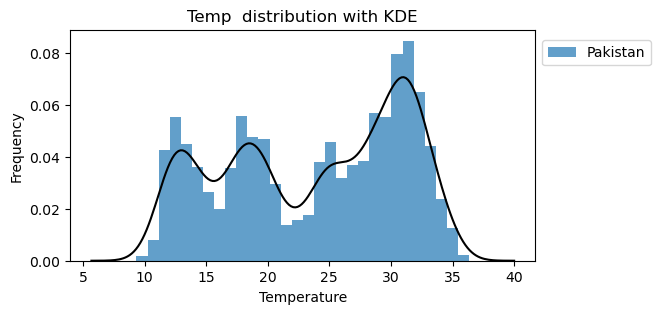

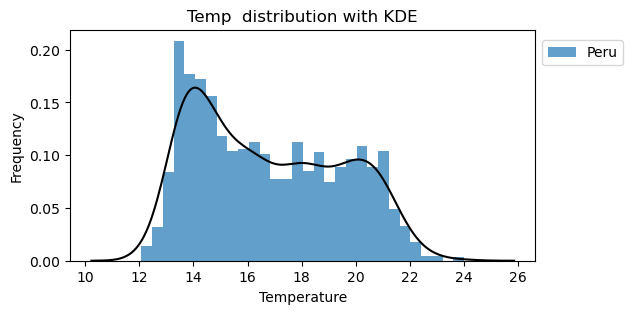

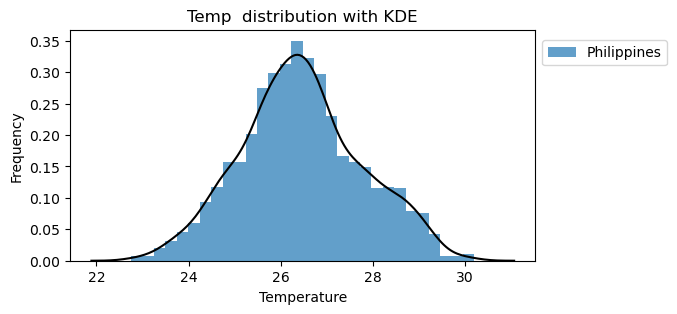

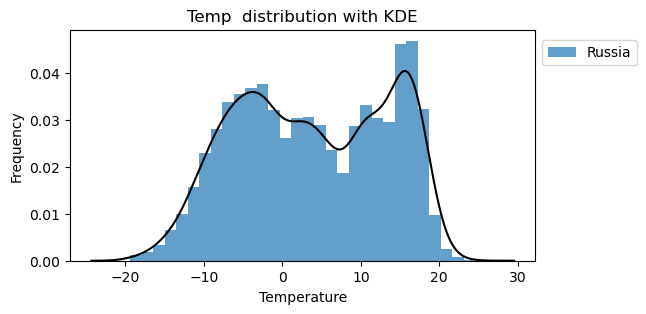

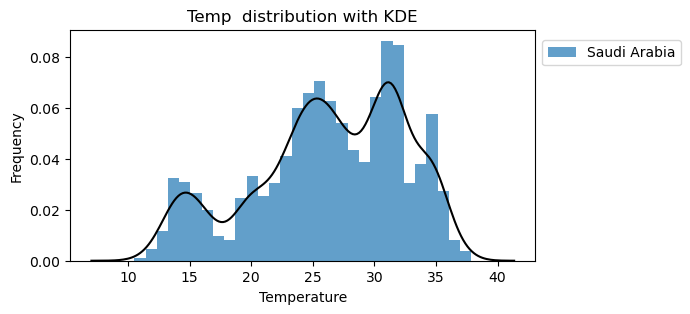

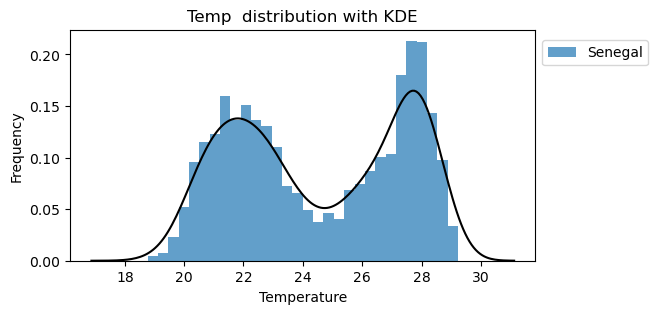

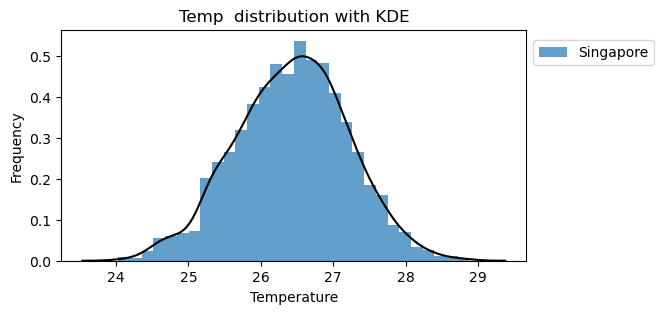

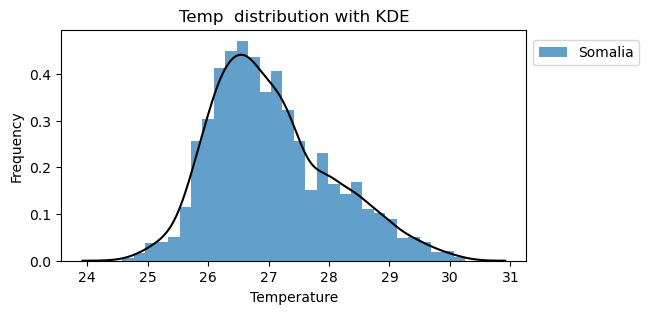

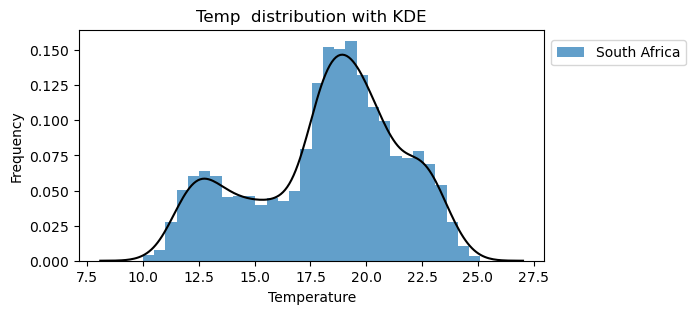

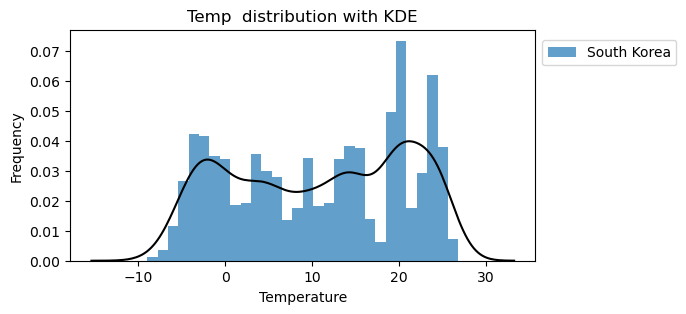

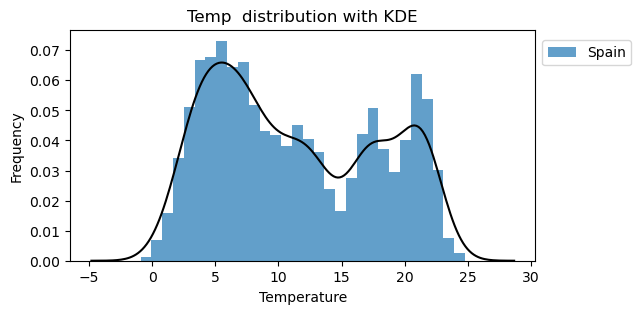

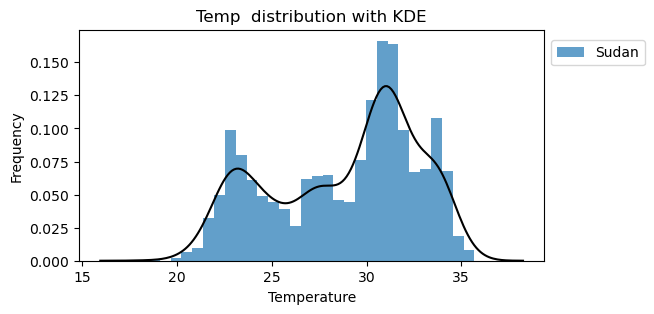

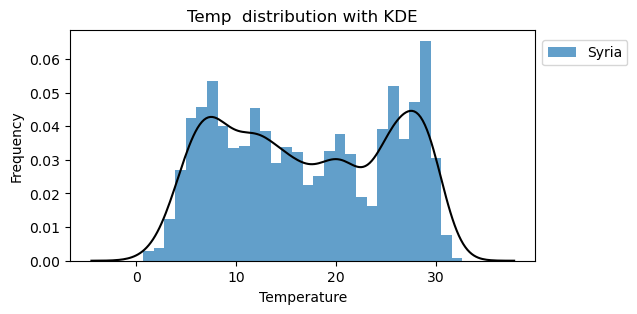

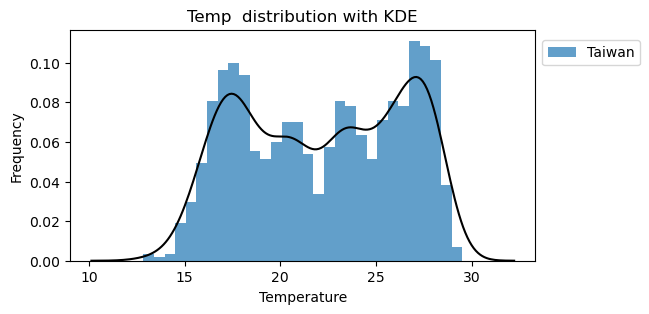

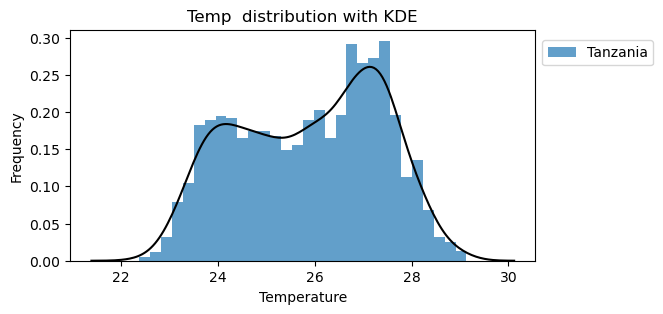

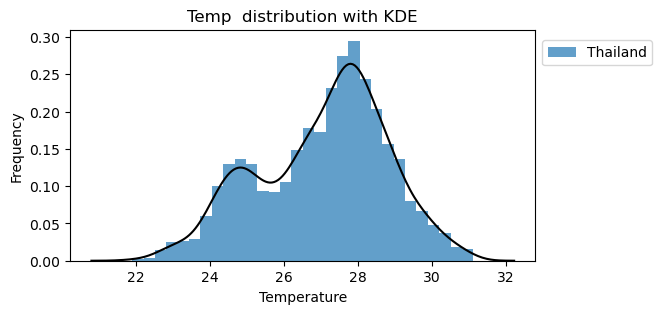

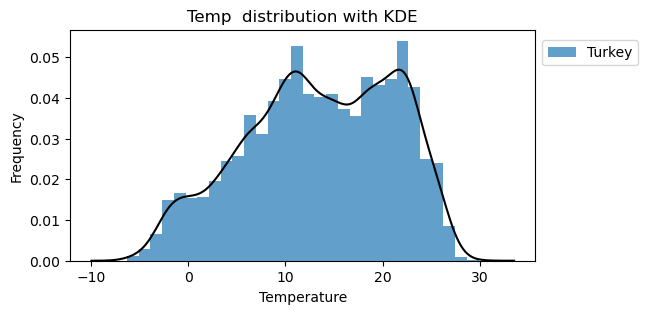

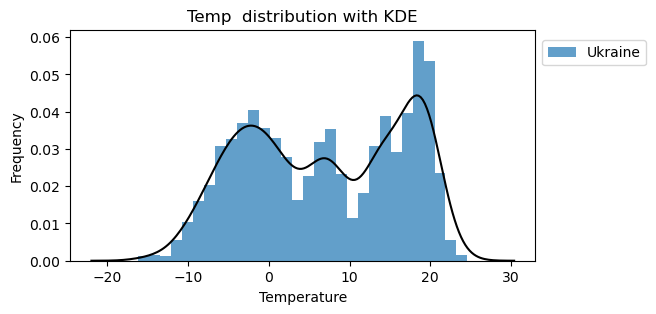

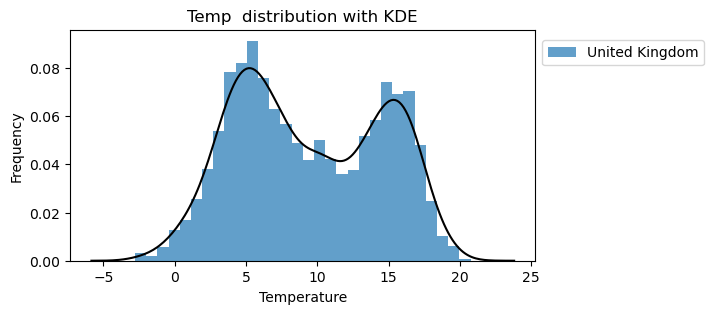

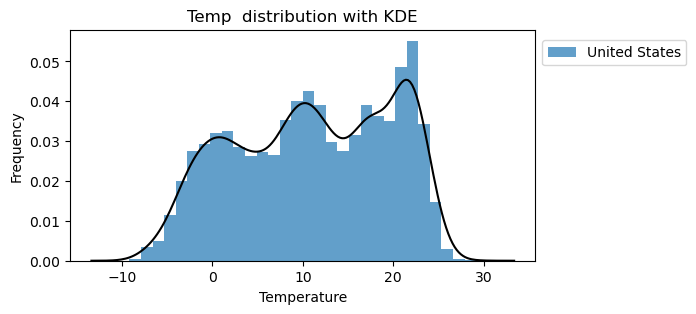

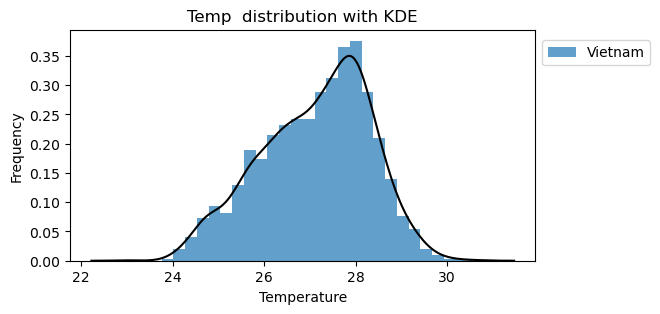

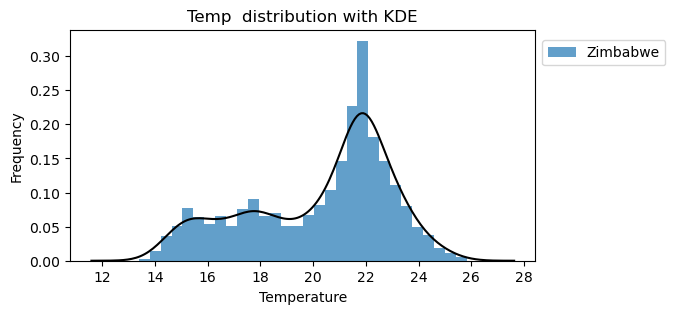

In [48]:
for i in country_list:
    dataC = df[df['Country'] == i][avgT]

    # Linear interpolation
    dataC = dataC.interpolate(method='linear')
    
    # Plot histogram
    plt.subplots(figsize=(6, 3))
    plt.hist(dataC, bins=30, alpha=0.7, label=i, density=True)
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    sns.kdeplot(dataC, label=i, color='black')
    plt.title('Temp  distribution with KDE')
    plt.xlabel('Temperature')
    plt.ylabel('Frequency')
    plt.show()

## Line plot with Regression

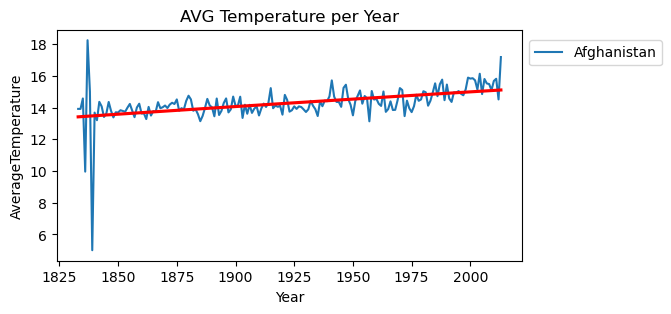

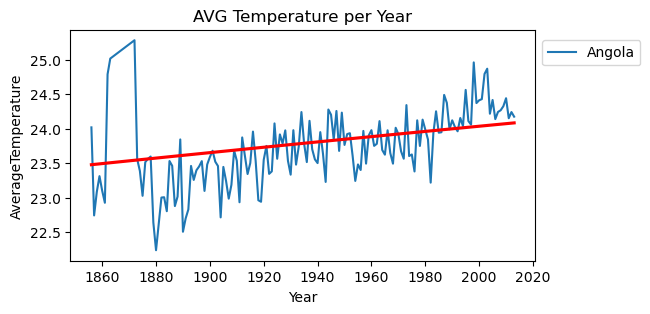

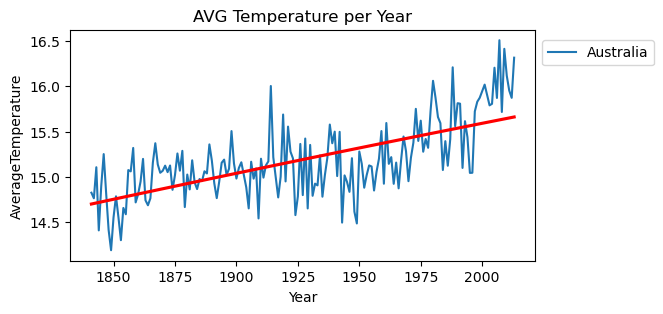

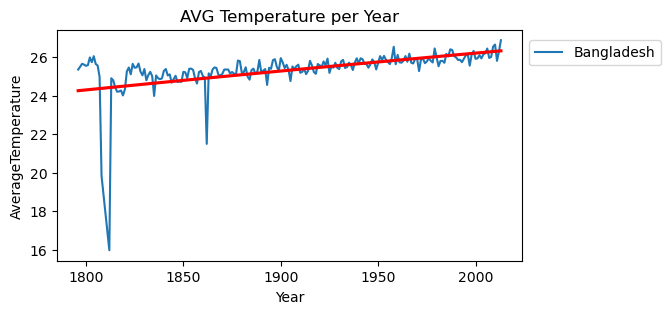

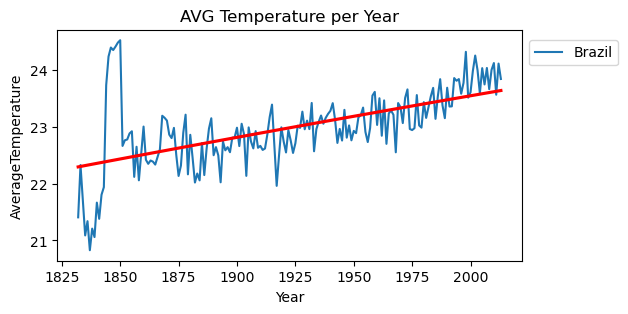

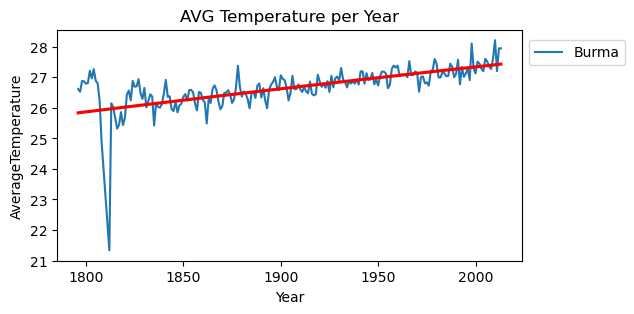

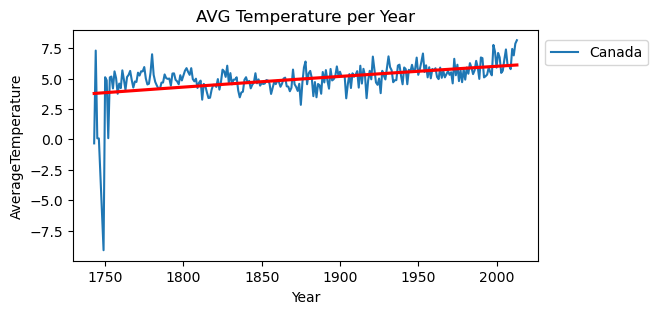

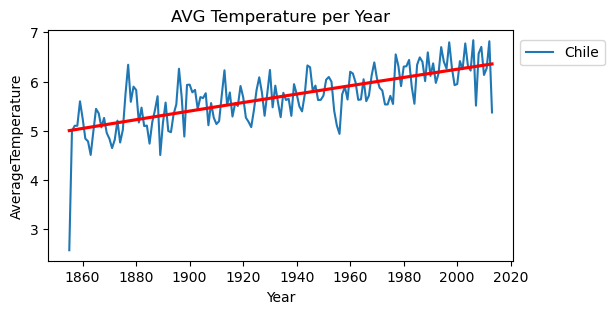

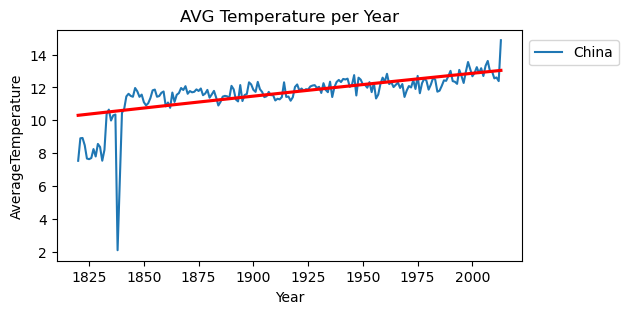

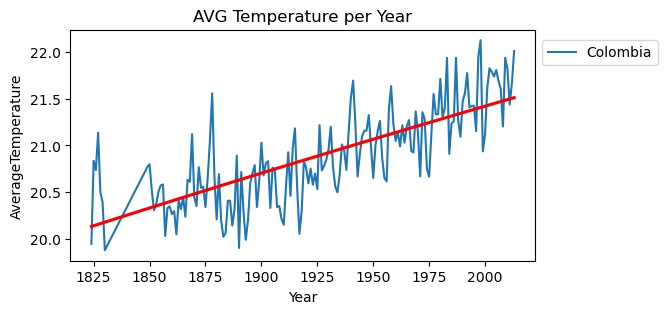

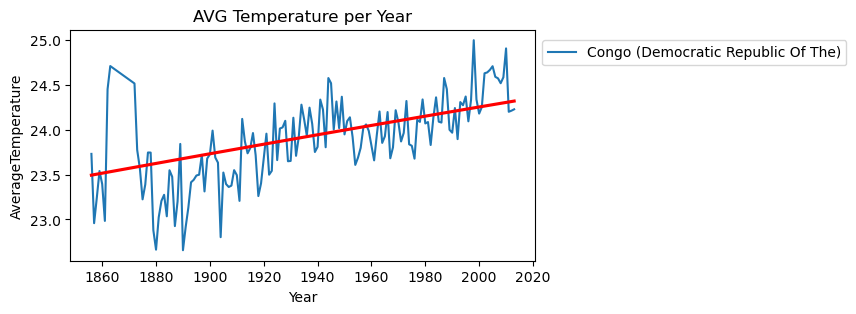

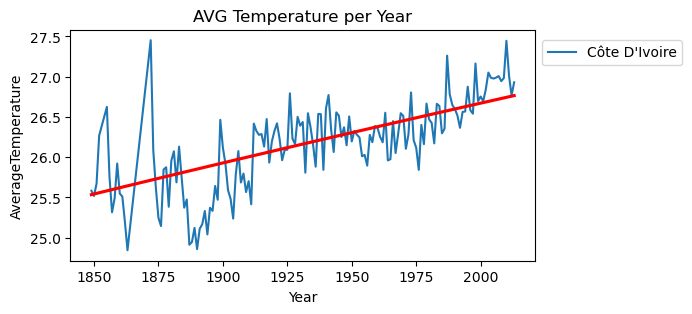

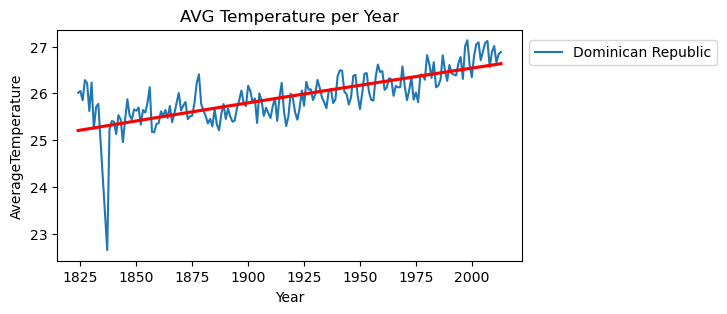

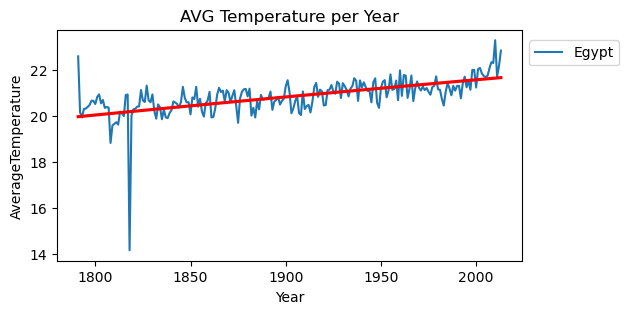

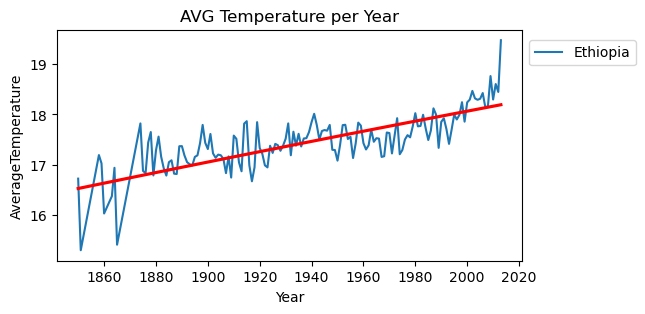

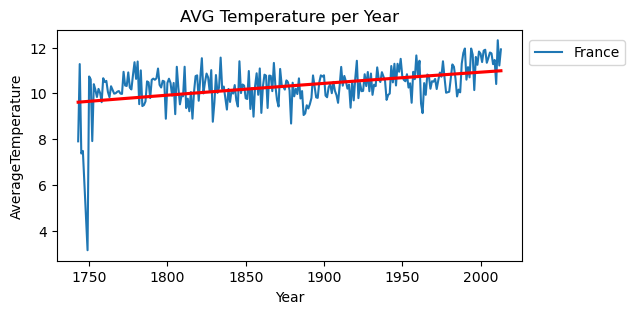

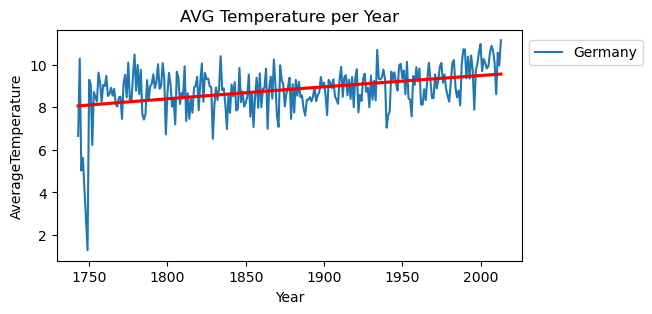

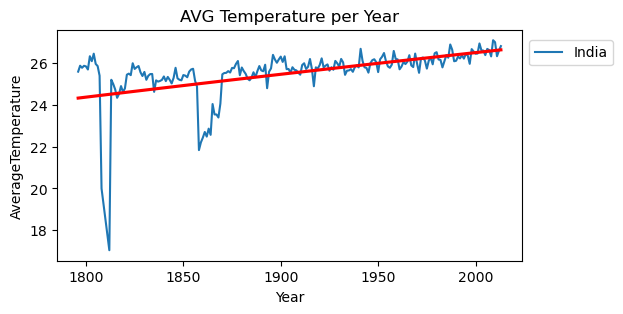

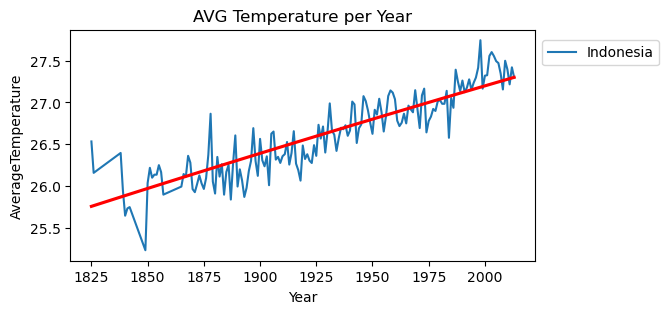

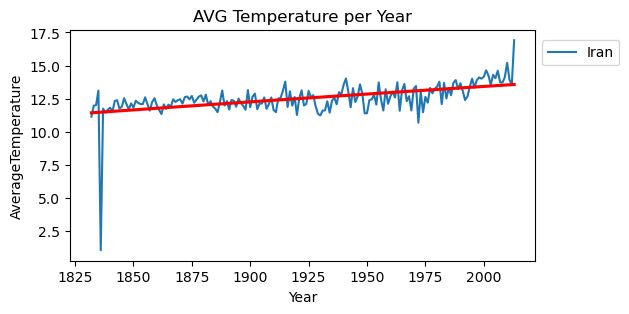

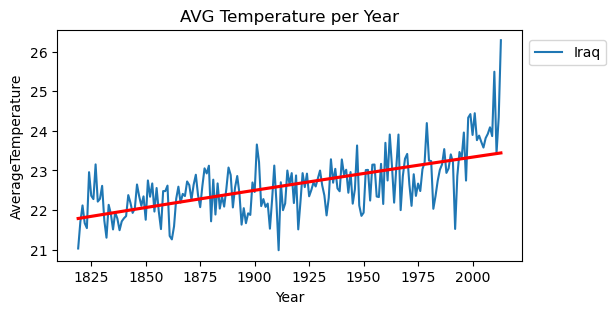

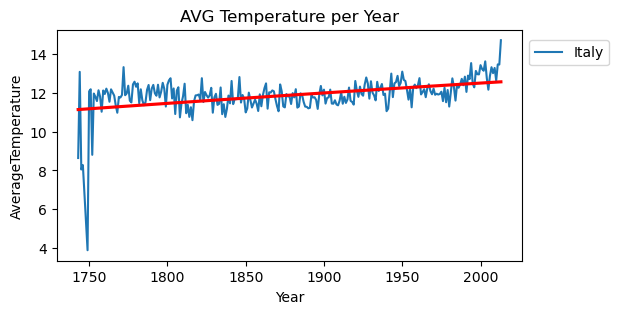

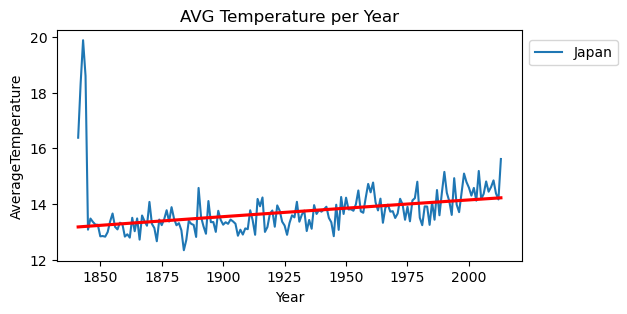

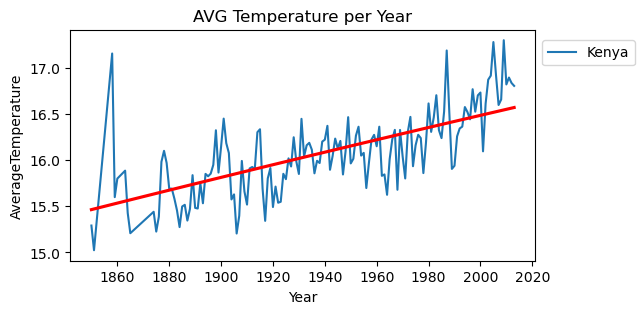

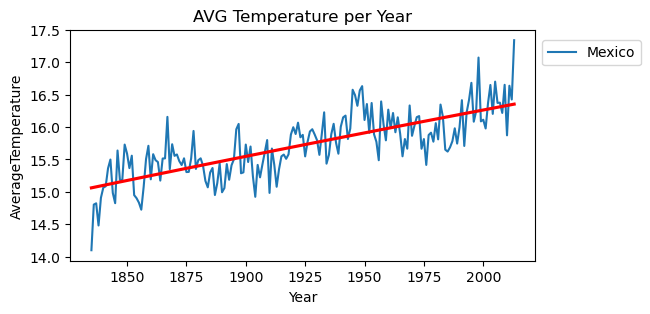

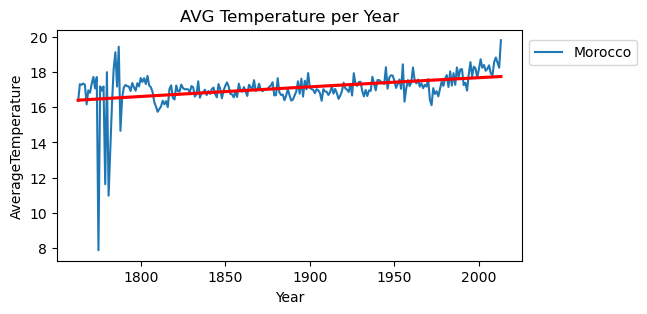

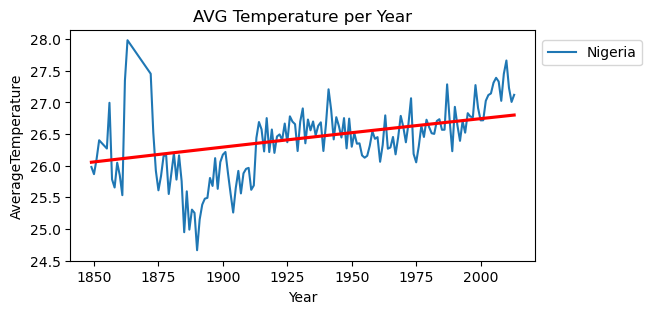

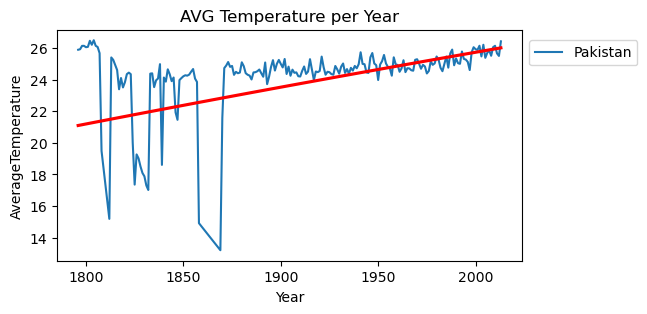

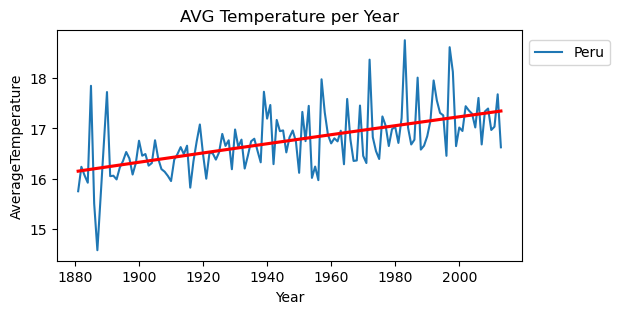

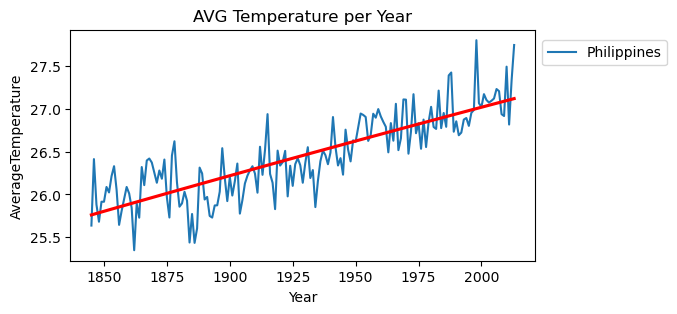

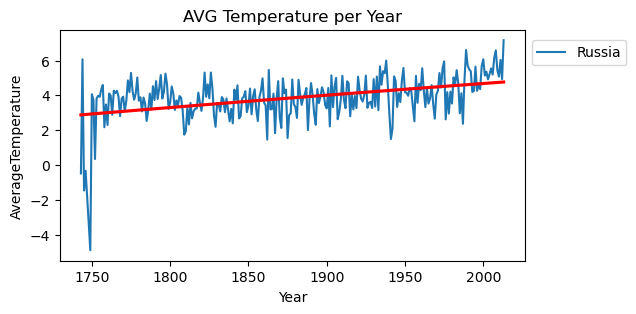

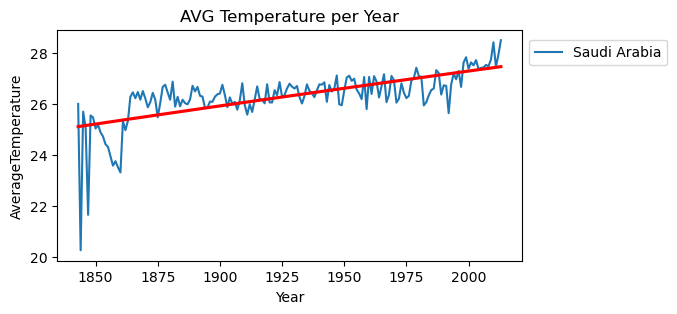

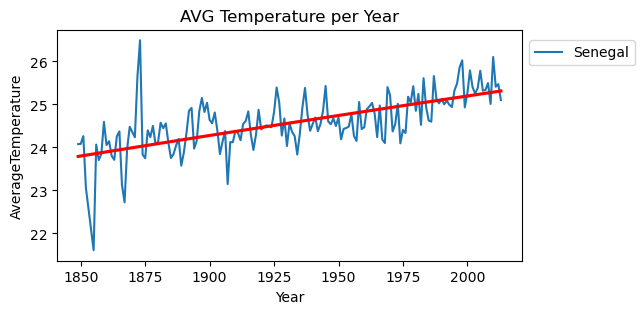

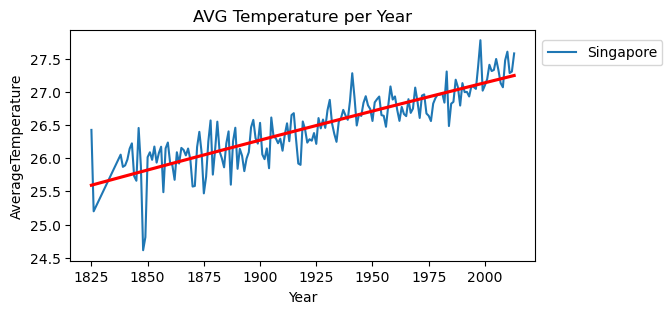

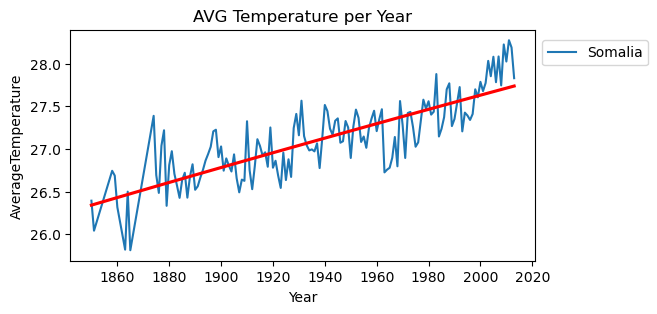

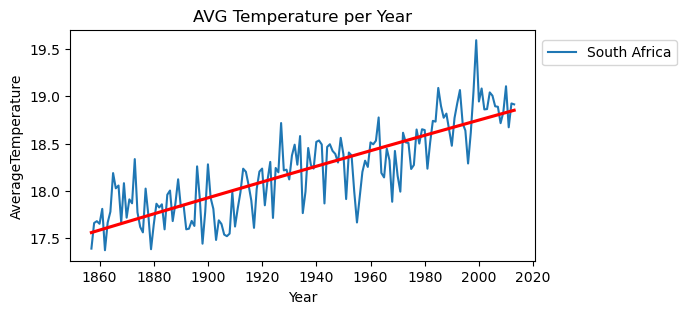

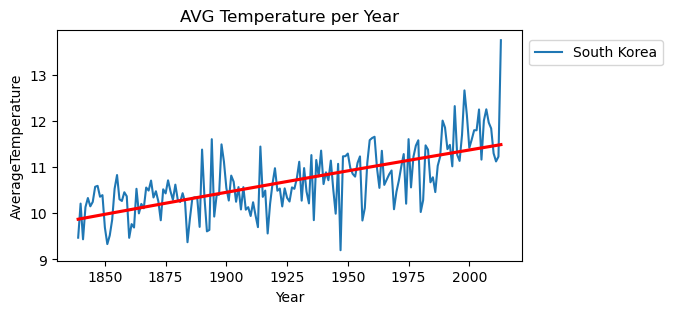

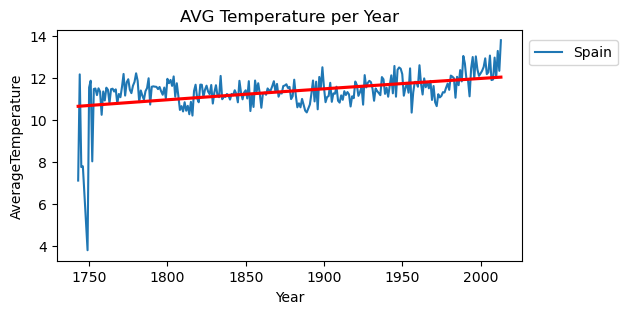

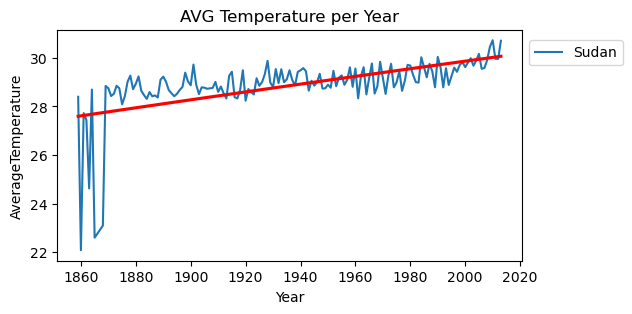

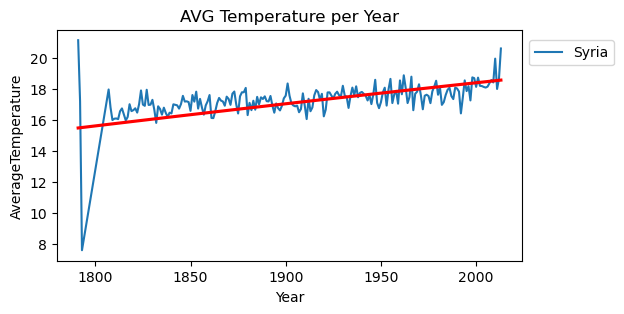

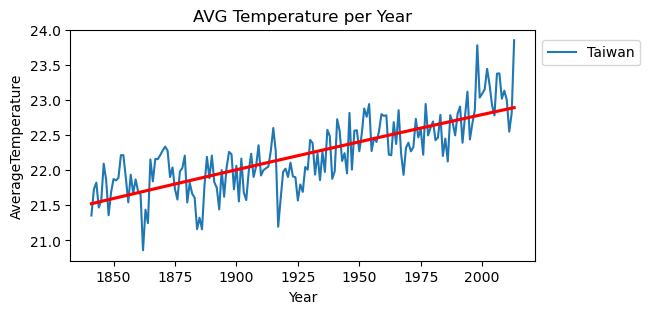

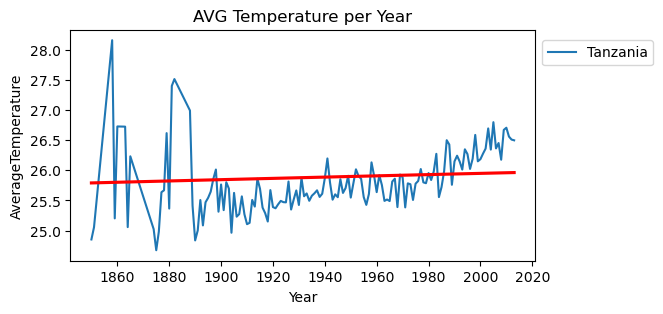

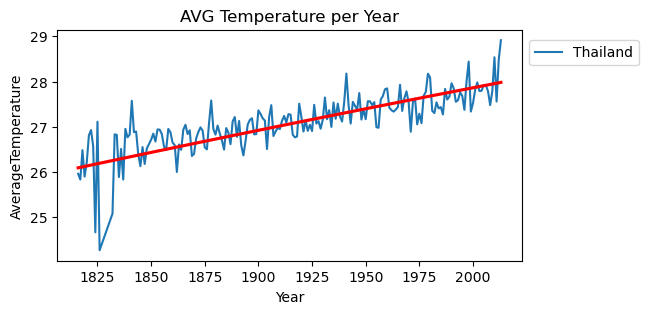

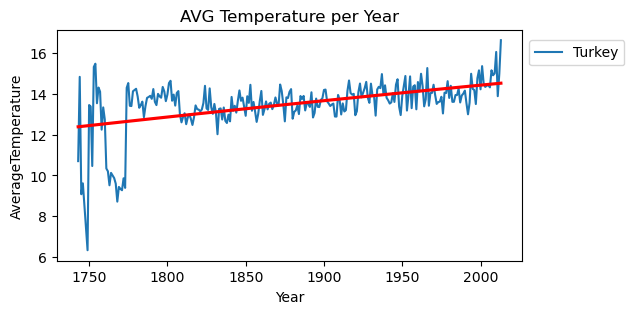

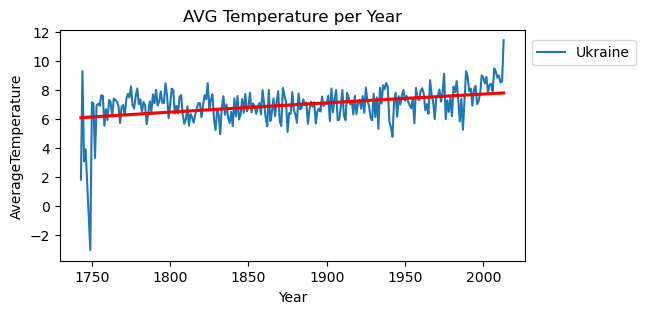

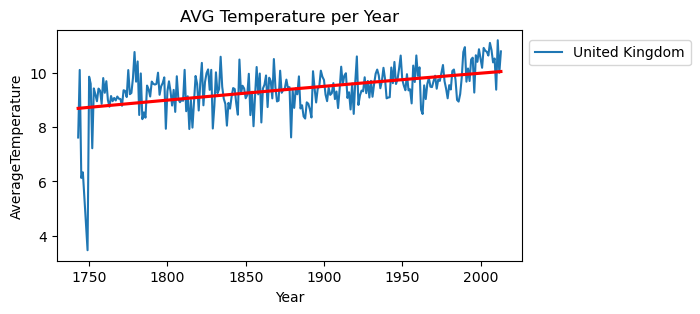

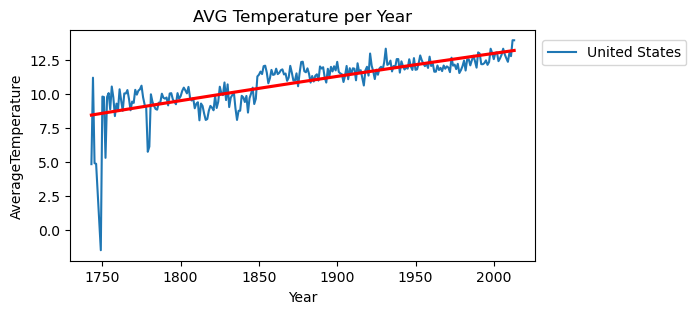

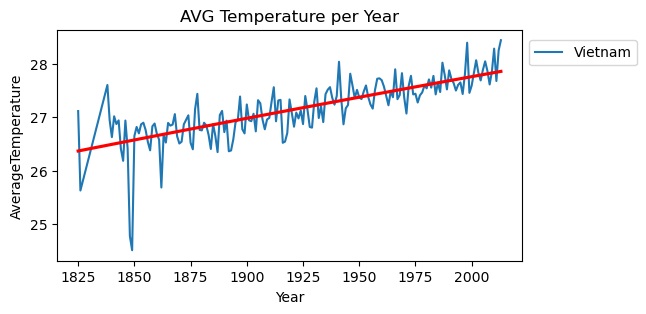

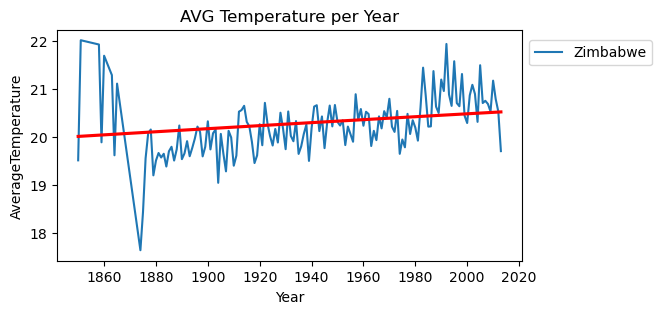

In [49]:
for i in country_list:
    data_country = df[df['Country'] == i][['year', avgT]]
    dataD = data_country.interpolate(method='linear')

    plt.subplots(figsize=(6, 3))
    sns.lineplot(x='year', y=avgT, data=dataD, errorbar=None, label=i)

    # Regression line
    sns.regplot(x='year', y=avgT, data=dataD, scatter=False, logx=True, color="r", ci=None)
    
    plt.legend(loc='center left', bbox_to_anchor=(1, 0.9))
    plt.title('AVG Temperature per Year')
    plt.xlabel('Year')
    plt.show()